In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output

import warnings
warnings.filterwarnings("ignore")

In [2]:
df =pd.read_csv('stock_data.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt,Stock
0,07-09-1984,0.42388,0.42902,0.41874,0.42388,23220030,0,AAPL
1,10-09-1984,0.42388,0.42516,0.41366,0.42134,18022532,0,AAPL
2,11-09-1984,0.42516,0.43668,0.42516,0.42902,42498199,0,AAPL
3,12-09-1984,0.42902,0.43157,0.41618,0.41618,37125801,0,AAPL
4,13-09-1984,0.43927,0.44052,0.43927,0.43927,57822062,0,AAPL


In [4]:
df.tail()

,Date,Open,High,Low,Close,Volume,OpenInt,Stock
19581,06-11-2017,178.56,180.450,178.310,180.17,13275578,0,FB
19582,07-11-2017,180.50,180.748,179.403,180.25,12903836,0,FB
19583,08-11-2017,179.79,180.350,179.110,179.56,10467606,0,FB
19584,09-11-2017,178.31,179.400,177.090,179.30,12602188,0,FB
19585,10-11-2017,178.35,179.100,177.960,178.46,11060355,0,FB


The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [5]:
df.shape

(19586, 8)

In [6]:
list(df)

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt', 'Stock']

In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt', 'Stock'], dtype='object')

In [8]:
df.isnull().any()

Date       False
Open       False
High       False
Low        False
Close      False
Volume     False
OpenInt    False
Stock      False
dtype: bool

In [9]:
df.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
Stock      0
dtype: int64

In [10]:
df.describe()

,Open,High,Low,Close,Volume,OpenInt
count,19586.000000,19586.000000,19586.000000,19586.000000,1.958600e+04,19586.0
mean,37.408582,37.881571,36.906405,37.406667,8.100395e+07,0.0
std,59.492049,60.287797,58.622548,59.480058,7.982366e+07,0.0
min,0.067200,0.067200,0.067200,0.067200,0.000000e+00,0.0
25%,1.412300,1.440600,1.384100,1.412300,3.385552e+07,0.0
50%,19.649500,19.933000,19.363000,19.640000,6.294731e+07,0.0
75%,38.605000,39.075750,38.229250,38.655500,1.010604e+08,0.0
max,386.690000,389.610000,379.345000,385.000000,2.069770e+09,0.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19586 entries, 0 to 19585
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     19586 non-null  object 
 1   Open     19586 non-null  float64
 2   High     19586 non-null  float64
 3   Low      19586 non-null  float64
 4   Close    19586 non-null  float64
 5   Volume   19586 non-null  int64  
 6   OpenInt  19586 non-null  int64  
 7   Stock    19586 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 1.2+ MB


In [12]:
df.describe(include = "all")

,Date,Open,High,Low,Close,Volume,OpenInt,Stock
count,19586,19586.000000,19586.000000,19586.000000,19586.000000,1.958600e+04,19586.0,19586
unique,8366,NaN,NaN,NaN,NaN,NaN,NaN,4
top,10-08-2015,NaN,NaN,NaN,NaN,NaN,NaN,AAPL
freq,4,NaN,NaN,NaN,NaN,NaN,NaN,8364
mean,NaN,37.408582,37.881571,36.906405,37.406667,8.100395e+07,0.0,NaN
std,NaN,59.492049,60.287797,58.622548,59.480058,7.982366e+07,0.0,NaN
min,NaN,0.067200,0.067200,0.067200,0.067200,0.000000e+00,0.0,NaN
25%,NaN,1.412300,1.440600,1.384100,1.412300,3.385552e+07,0.0,NaN
50%,NaN,19.649500,19.933000,19.363000,19.640000,6.294731e+07,0.0,NaN
75%,NaN,38.605000,39.075750,38.229250,38.655500,1.010604e+08,0.0,NaN


In [14]:
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
print(f'df comtains stock prices between {df.Date.min()} {df.Date.max()}')
print(f'Total days = {(df.Date.max() - df.Date.min()).days}days')

df comtains stock prices between 1984-01-10 00:00:00 2017-12-10 00:00:00
Total days = 12388days


In [17]:
len(df)-len(df.drop_duplicates())

0

In [18]:
df["Change"] = df["Close"] - df["Open"]
df_interest = df[["Stock", "Date", "Open", "Close", "Change", "Volume"]]
df_interest["Date"] = pd.to_datetime(df_interest["Date"])
df_interest.head()

,Stock,Date,Open,Close,Change,Volume
0,AAPL,1984-07-09,0.42388,0.42388,0.00000,23220030
1,AAPL,1984-10-09,0.42388,0.42134,-0.00254,18022532
2,AAPL,1984-11-09,0.42516,0.42902,0.00386,42498199
3,AAPL,1984-12-09,0.42902,0.41618,-0.01284,37125801
4,AAPL,1984-09-13,0.43927,0.43927,0.00000,57822062


In [20]:
symbolCloseWide = df.pivot(index='Stock', 
                                  columns='Date', 
                                  values='Close')
symbolCloseWide.head()

Date,1984-01-10,1984-01-11,1984-02-10,1984-02-11,1984-03-10,1984-03-12,1984-04-10,1984-04-12,1984-05-10,1984-05-11,...,2017-11-08,2017-11-09,2017-11-10,2017-12-01,2017-12-04,2017-12-05,2017-12-06,2017-12-07,2017-12-09,2017-12-10
Stock,,,,,,,,,,,,,,,,,,,,,
AAPL,0.39186,0.39956,0.39443,0.39699,0.40081,0.38932,0.40593,0.39699,0.39699,0.39443,...,156.920,160.92,155.99,117.37,140.170,154.93,144.33,144.650,160.28,155.44
FB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,168.080,173.51,172.74,126.62,139.580,150.33,148.44,158.900,172.95,172.55
MSFT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,72.116,74.76,76.42,61.55,64.514,67.63,69.41,70.773,74.68,77.12
TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,357.870,363.69,354.60,229.59,296.840,324.81,359.01,329.520,362.75,355.68


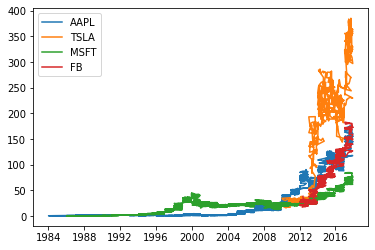

In [21]:
symbols = df_interest["Stock"].unique().tolist()
for u in symbols[:10]:
    dates = df_interest[(df_interest["Stock"] == u)]["Date"]
    values = df_interest[(df_interest["Stock"] == u)]["Close"]
    plt.plot(dates.tolist(), values.tolist())
plt.legend(symbols, loc='upper left')
plt.show()

In [22]:
df.corr()

,Open,High,Low,Close,Volume,OpenInt,Change
Open,1.000000,0.999876,0.999855,0.999742,-0.297061,NaN,-0.020229
High,0.999876,1.000000,0.999805,0.999882,-0.296594,NaN,-0.008610
Low,0.999855,0.999805,1.000000,0.999876,-0.297922,NaN,-0.007941
Close,0.999742,0.999882,0.999876,1.000000,-0.297291,NaN,0.002476
Volume,-0.297061,-0.296594,-0.297922,-0.297291,1.000000,NaN,-0.007499
OpenInt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Change,-0.020229,-0.008610,-0.007941,0.002476,-0.007499,NaN,1.000000


<AxesSubplot:>

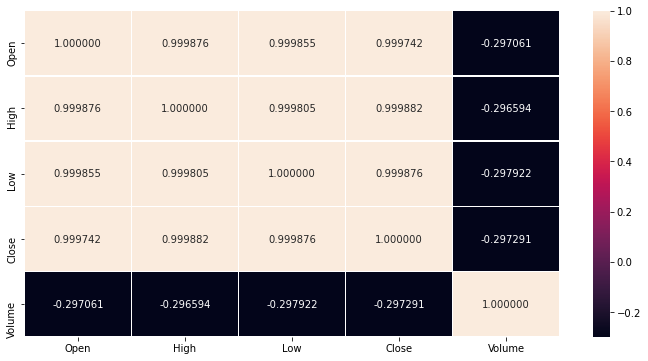

In [24]:
import seaborn as sns
plt.figure(figsize=(12,6))
autoDataColumns = ['Open','High','Low','Close','Volume']
sns.heatmap(df[autoDataColumns].corr(), annot=True, fmt='.6f', linewidths=.5)

In [25]:
#Mask by most recent year
latest_year = max(pd.unique(list(df_interest["Date"].apply(lambda x:x.year))))
latest_year_mask = [i==latest_year for i in df_interest["Date"].apply(lambda x:x.year)]
df_masked1 = df_interest[latest_year_mask]
df_masked1.head()

,Stock,Date,Open,Close,Change,Volume
8146,AAPL,2017-03-01,113.97,114.31,0.34,28186251
8147,AAPL,2017-04-01,114.02,114.19,0.17,20850505
8148,AAPL,2017-05-01,114.09,114.77,0.68,22044719
8149,AAPL,2017-06-01,114.94,116.04,1.10,31419514
8150,AAPL,2017-09-01,116.08,117.11,1.03,32145605


In [26]:
#Mask by most top 10 closers
symbols = df_interest["Stock"].unique().tolist()
maxPerSymbol={}
for u in symbols:
    values = df_interest[(df_interest["Stock"] == u)]["Close"].tolist()
    maxPerSymbol[u] = max(values)

top10Closers = list(dict(sorted(maxPerSymbol.items(), 
                   key=lambda v:v[1], #sort by key -> v[0] | sort by value->v[1]
                   reverse=True)[:10]).keys())

top_10_mask = [i in top10Closers for i in df_masked1["Stock"].tolist()]
df_masked2 = df_masked1[top_10_mask]
df_masked2.head()

,Stock,Date,Open,Close,Change,Volume
8146,AAPL,2017-03-01,113.97,114.31,0.34,28186251
8147,AAPL,2017-04-01,114.02,114.19,0.17,20850505
8148,AAPL,2017-05-01,114.09,114.77,0.68,22044719
8149,AAPL,2017-06-01,114.94,116.04,1.10,31419514
8150,AAPL,2017-09-01,116.08,117.11,1.03,32145605


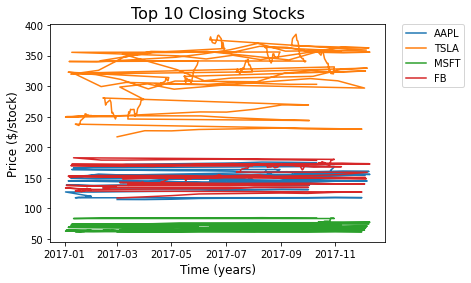

In [27]:
symbols = df_masked2["Stock"].unique().tolist()
for u in symbols[:10]:
    dates = df_masked2[(df_interest["Stock"] == u)]["Date"]
    values = df_masked2[(df_interest["Stock"] == u)]["Close"]
    plt.plot(dates.tolist(), values.tolist())
#plt.legend(symbols, loc='upper left')
plt.legend(symbols, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title(r'Top 10 Closing Stocks', fontsize=16)

plt.xlabel('Time (years)', fontsize=12)
plt.ylabel('Price ($/stock)', fontsize=12)
plt.show()